Newton's 3rd Law
Matthew Saporito
9/2/2022

#  <font color='Red'> **Import Necessary Modules** </font>

In [155]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [156]:
###
def rotation_xy(θ):
    """ 
    GIVEN: θ (in degrees) 
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Defintions.** </font> 

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font> 

In [157]:
rotation_xy(64)

array([[ 0.43837115, -0.89879405,  0.        ],
       [ 0.89879405,  0.43837115,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font> 

In [158]:
basis = rotation_xy(45) @ np.eye(3).T 
print (basis)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font> 

In [159]:
f_in = np.array([0., -1.62, 0.])

###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force (tentative. </font> 

In [160]:
f_out = -f_in
print (f_out)

[-0.    1.62 -0.  ]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font> 

In [161]:
f_fric, f_normal, f_z = projection(basis, f_out)

In [162]:
f_fric

array([-0.81,  0.81, -0.  ])

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font> 

In [163]:
μS = 1.5
μK = 1.0
f_breakingpoint = np.linalg.norm( μS*f_normal )
if np.linalg.norm( f_fric ) < f_breakingpoint:
  None
else:
  np.linalg.norm( μK*f_normal ) * f_fric/np.linalg.norm( f_fric )

  

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font> 

In [164]:
f_net = f_fric + f_normal + f_z + f_in
print (f_net)

[-1.11022302e-16  0.00000000e+00  0.00000000e+00]


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above. 

### Add this to f_in, do the results match from above? </font> 

In [165]:
Ramp(45, μS, μK, f_in) + f_in
print ( np.linalg.norm(f_net) )

1.1102230246251565e-16


#  <font color='Red'> **Experiment 2: Varying Angle.** </font> 

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font> 

In [166]:
θ = np.arange (0, 91, 1)

print(θ)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font> 

In [167]:
μS = 0.35
μK = 0

f_in = np.array([0., -1.62, 0.])
f_mag = np.zeros(len(θ))

for i in range(len(θ)):
  f_mag[i] = np.linalg.norm(Ramp(θ[i], μS, μK, f_in) + f_in)

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

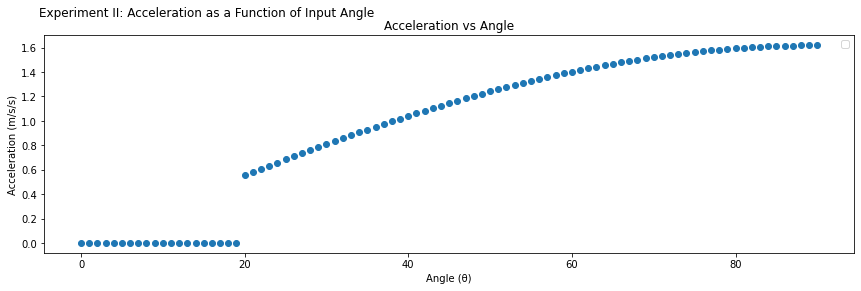

In [168]:
fig, (ax1) = plt.subplots(1)
fig.suptitle("Experiment II: Acceleration as a Function of Input Angle")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(θ, f_mag)
ax1.set_title("Acceleration vs Angle")
ax1.legend()
ax1.set(xlabel="Angle (θ)", ylabel="Acceleration (m/s/s)")
fig.show

Fig 1: The graph above describes the relationship between acceleration and angle with respect to the horizontal of an object on a ramp. The angle is increased continuously from 0 to 90 degrees in increments of 1 degree. The graph shows the object does not accelerate from 0 to approximately 20 degrees due to the coefficient of static friction of the surface. The critical angle is reached at around 20 degrees and the object begins accelerating which can be seen from the logarithmic shape of the curve. The object reaches a maximum acceleration of 1.62 m/s/s at 90 degrees, as the object is essentially in free fall since the ramp is perpendicular to the horizontal.  

#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font> 

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font> 

In [169]:
μS = np.arange (0, 1.01, .01)

print(μS)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font> 

In [170]:
θ = 17
μK = 0

f_in = np.array([0., -1.62, 0.])
f_mag = np.zeros(len(μS))

for i in range(len(μS)):
  f_mag[i] = np.linalg.norm(Ramp(θ, μS[i], μK, f_in) + f_in)

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

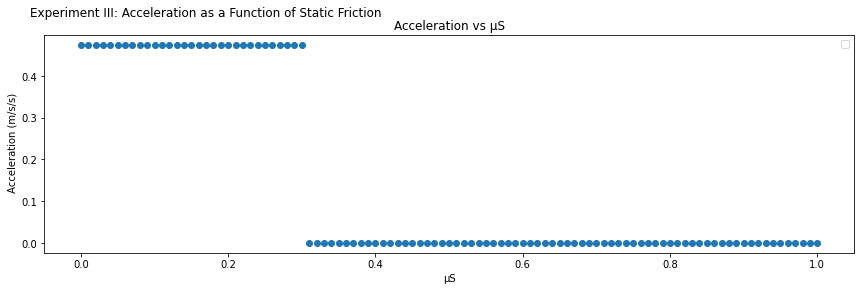

In [171]:
fig, (ax1) = plt.subplots(1)
fig.suptitle("Experiment III: Acceleration as a Function of Static Friction")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(μS, f_mag)
ax1.set_title("Acceleration vs μS")
ax1.legend()
ax1.set(xlabel="μS", ylabel=" Acceleration (m/s/s)")
fig.show

Fig 2: The graph above describes the relationship between acceleration and static friction of an object on a ramp. The angle is fixed at 17 degrees with respect to the horizontal while the coefficient of static friction is increased from 0 to 1 in increments of 0.01. The graph shows the object undergoes constant acceleration of approximately 0.5 m/s/s for coefficient of friction values of 0 to approximately 0.3, following the relationship a=g*sin(θ). After this value, μS impedes the object's motion and its acceleration is zero. 

#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font> 

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font> 

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk) 
 </font> 

In [172]:
Δt=1.0
time = np.arange(0, 30.0, Δt)
mass = 0.75
x_0 = np.array([0., 0., 0.])
v_0 = np.array([0., 0., 0.])
a_0 = np.array([0., 0., 0.])
θ = 15
μS = 0.5
μK = 0.25

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font> 

In [173]:
g = -1.62 ## m/s/s
f_t = np.zeros((len(time),3))
g = -1.62 ## m/s/s
f_t[0:30, 1] = g


###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font> 

In [174]:
x_t = np.zeros((len(time), 3 ))
v_t = np.zeros((len(time), 3 ))
a_t = np.zeros((len(time), 3 ))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = (Ramp(θ, μS, μK, f_t[t-1]) + f_t[t-1] )/mass

for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = (Ramp(θ, μS, μK, f_t[t-1]) + f_t[t-1] )/mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

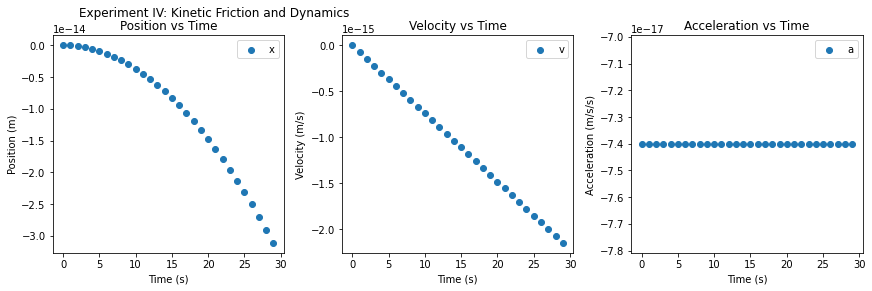

In [175]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment IV: Kinetic Friction and Dynamics")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,0], label="x")
ax1.set_title("Position vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Position (m)")

ax2.scatter(time, (v_t[:,0]), label="v")
ax2.set_title("Velocity vs Time")
ax2.legend()
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")

ax3.scatter(time, a_t[:,0], label="a")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration vs Time")
ax3.set(xlabel="Time (s)", ylabel="Acceleration (m/s/s)")
fig.show()

Fig 3: The first graph above describes the relationship between position and time of an object on a ramp between 0 and 30 seconds. The mass of the object is 0.75 kg, the angle of the ramp is 15 degrees with respect to the horizontal, static friction is 0.5, kinetic friction is 0.25, and acceleration due to gravity is -1.62 m/s/s. The position of the object from the starting point changes exponentially as the object accelerates down the ramp.

Fig 4: The second graph shows the velocity of the object constantly increasing from 0 to approximately 2.1 m/s. The value is negative since velocity is a vector which has both magnitude and direction. In this case, the direction is down the ramp away from the starting point.  

Fig 5: The third graph shows the acceleration of the object moving down the ramp as a function of time. In this case, acceleration is constant and should follow the relationship a=g*sin(θ).

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>


###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

If the surface which an object rests upon is completely parallel to the gravity vector, this implies that the surface, in our case the ramp, is at 90° with respect to the horizontal. Under this condition, static friction is irrelevant since the object is in free fall. Thus, for

a=g*sinθ, 

when θ = 90°,

a=g.


###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>

When the static coefficient value is 0.0, an object will not move if it is resting on a completely horizontal surface. That is, there can be no angle, θ, with respect to the horizontal. There can also be no horizontal component of force acting on the object. If such a force did exist, the object would undergo motion. 


Conclusion: 

In this lab, an object on an inclined plane was analyzed under various conditions. Specifically, values for θ, μ_k, and μ_s were varied and the resulting acceleration was observed. It was found that an object began to accelerate at a critical angle when μ_s was constant. It was also observed that when θ of an inclined plane is kept constant, an object will accelerate downward until μ_s is sufficiently high. Finally, the dynamics of an object on an inclined were observed. 